**The Notebook contains the code for Building Neural Network with the MNIST data
Target of architecture: To Design a network which is worth of just learning the things without any special features such as Batch Normalization, Dropout, Augmentations**

* Description: The network architecture is built heavily to just introduce the design. This network has been made with 7K parameters which makes it a heavier model.The Receptive Field looks out a 33 with Convolutions + FC layers , make up to Image size.

* EPOCHS: Iterated the dataset for 15 times.

* BATCHSIZE : 128

In [1]:
!git clone https://github.com/kishkath/ERA.git

Cloning into 'ERA'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 77 (delta 22), reused 50 (delta 6), pack-reused 0
Receiving objects: 100% (77/77), 506.50 KiB | 4.73 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [2]:
!pip install torch-summary

In [3]:
import os
os.chdir( "/kaggle/working/ERA/7 - InDepth Coding Session/")

In [4]:
from utility.utils import allot_device, Load_dataset, Plots, Performance, scores
from models.model3 import NetArch3,return_summary

In [5]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary

In [6]:
 # Setting up the device 
device = allot_device(42)
print(f"{device} is available")

cuda is available


In [7]:
## Loading & Reading the dataset
train_loader,test_loader = Load_dataset(128,transforms=True).get_dataset()
print(len(train_loader),len(test_loader))

100%|██████████| 9912422/9912422 [00:00<00:00, 103278040.46it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 62960339.83it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26740380.68it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 11943905.18it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw

469 79


/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


<Figure size 640x480 with 0 Axes>

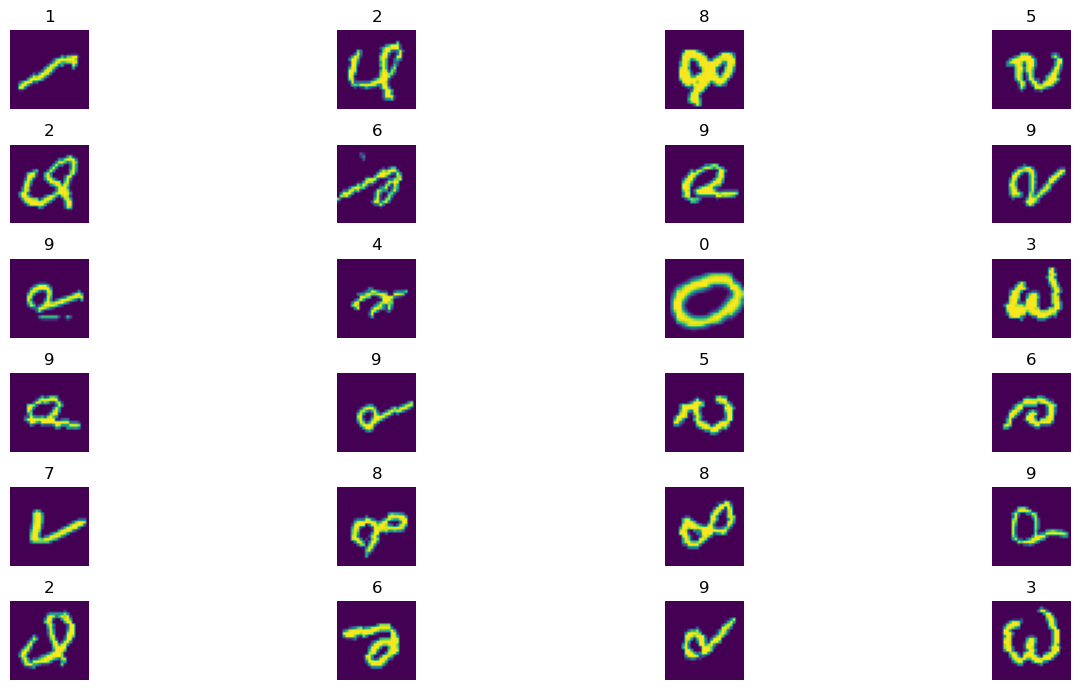

In [8]:

# Plots training images (number divisible by 4) 
Plots(24,train_loader).plot_images()

<Figure size 640x480 with 0 Axes>

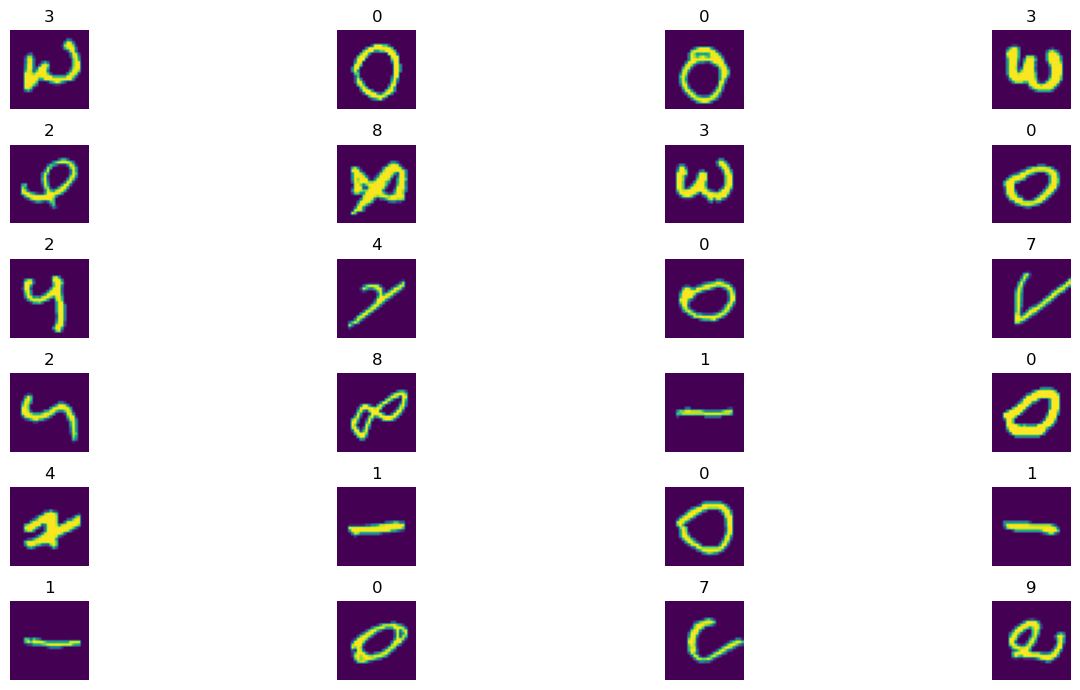

In [9]:
Plots(24,test_loader).plot_images()

In [10]:
### Defining the model
model = NetArch3().to(device)

In [11]:
return_summary(device,(1,28,28))

Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Conv2d: 2-1                       72
|    └─BatchNorm2d: 2-2                  16
|    └─ReLU: 2-3                         --
├─Sequential: 1-2                        --
|    └─Conv2d: 2-4                       1,152
|    └─BatchNorm2d: 2-5                  32
|    └─ReLU: 2-6                         --
├─MaxPool2d: 1-3                         --
├─Sequential: 1-4                        --
|    └─Conv2d: 2-7                       2,304
|    └─BatchNorm2d: 2-8                  32
|    └─ReLU: 2-9                         --
├─Sequential: 1-5                        --
|    └─Conv2d: 2-10                      2,880
|    └─BatchNorm2d: 2-11                 40
|    └─ReLU: 2-12                        --
├─MaxPool2d: 1-6                         --
├─Sequential: 1-7                        --
|    └─Conv2d: 2-13                      200
|    └─BatchNorm2d: 2-14                 20
|    └─ReLU: 2-15

Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Conv2d: 2-1                       72
|    └─BatchNorm2d: 2-2                  16
|    └─ReLU: 2-3                         --
├─Sequential: 1-2                        --
|    └─Conv2d: 2-4                       1,152
|    └─BatchNorm2d: 2-5                  32
|    └─ReLU: 2-6                         --
├─MaxPool2d: 1-3                         --
├─Sequential: 1-4                        --
|    └─Conv2d: 2-7                       2,304
|    └─BatchNorm2d: 2-8                  32
|    └─ReLU: 2-9                         --
├─Sequential: 1-5                        --
|    └─Conv2d: 2-10                      2,880
|    └─BatchNorm2d: 2-11                 40
|    └─ReLU: 2-12                        --
├─MaxPool2d: 1-6                         --
├─Sequential: 1-7                        --
|    └─Conv2d: 2-13                      200
|    └─BatchNorm2d: 2-14                 20
|    └─ReLU: 2-15

In [12]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 15

Adjusting learning rate of group 0 to 1.0000e-02.


In [13]:
perf = Performance(device,model,(train_loader,test_loader),optimizer,criterion)

     

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  perf.train()
  perf.test()
  scheduler.step()

Epoch 1


Train: Loss=0.2431 Batch_id=468 Accuracy=88.34: 100%|██████████| 469/469 [00:28<00:00, 16.19it/s]


Test set: Average loss: 0.0010, Accuracy: 9777/10000 (97.77%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1386 Batch_id=468 Accuracy=95.92: 100%|██████████| 469/469 [00:22<00:00, 20.94it/s]


Test set: Average loss: 0.0006, Accuracy: 9836/10000 (98.36%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1540 Batch_id=468 Accuracy=96.90: 100%|██████████| 469/469 [00:22<00:00, 21.30it/s]


Test set: Average loss: 0.0005, Accuracy: 9883/10000 (98.83%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0986 Batch_id=468 Accuracy=97.36: 100%|██████████| 469/469 [00:22<00:00, 20.82it/s]


Test set: Average loss: 0.0004, Accuracy: 9889/10000 (98.89%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.1593 Batch_id=468 Accuracy=97.61: 100%|██████████| 469/469 [00:22<00:00, 20.85it/s]


Test set: Average loss: 0.0004, Accuracy: 9887/10000 (98.87%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 6


Train: Loss=0.0809 Batch_id=468 Accuracy=97.95: 100%|██████████| 469/469 [00:22<00:00, 20.76it/s]


Test set: Average loss: 0.0003, Accuracy: 9909/10000 (99.09%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 7


Train: Loss=0.0558 Batch_id=468 Accuracy=98.11: 100%|██████████| 469/469 [00:22<00:00, 20.81it/s]


Test set: Average loss: 0.0003, Accuracy: 9909/10000 (99.09%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 8


Train: Loss=0.1665 Batch_id=468 Accuracy=98.09: 100%|██████████| 469/469 [00:21<00:00, 21.50it/s]


Test set: Average loss: 0.0003, Accuracy: 9911/10000 (99.11%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 9


Train: Loss=0.0623 Batch_id=468 Accuracy=98.05: 100%|██████████| 469/469 [00:22<00:00, 20.55it/s]


Test set: Average loss: 0.0003, Accuracy: 9913/10000 (99.13%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 10


Train: Loss=0.0517 Batch_id=468 Accuracy=97.97: 100%|██████████| 469/469 [00:23<00:00, 20.08it/s]


Test set: Average loss: 0.0003, Accuracy: 9914/10000 (99.14%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 11


Train: Loss=0.0742 Batch_id=468 Accuracy=98.13: 100%|██████████| 469/469 [00:22<00:00, 20.51it/s]


Test set: Average loss: 0.0003, Accuracy: 9914/10000 (99.14%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 12


Train: Loss=0.0642 Batch_id=468 Accuracy=98.18: 100%|██████████| 469/469 [00:21<00:00, 21.34it/s]


Test set: Average loss: 0.0003, Accuracy: 9909/10000 (99.09%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 13


Train: Loss=0.1469 Batch_id=468 Accuracy=98.14: 100%|██████████| 469/469 [00:22<00:00, 21.30it/s]


Test set: Average loss: 0.0003, Accuracy: 9914/10000 (99.14%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 14


Train: Loss=0.0454 Batch_id=468 Accuracy=98.09: 100%|██████████| 469/469 [00:22<00:00, 20.69it/s]


Test set: Average loss: 0.0003, Accuracy: 9915/10000 (99.15%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 15


Train: Loss=0.0913 Batch_id=468 Accuracy=98.14: 100%|██████████| 469/469 [00:22<00:00, 20.43it/s]


Test set: Average loss: 0.0003, Accuracy: 9905/10000 (99.05%)

Adjusting learning rate of group 0 to 1.0000e-05.


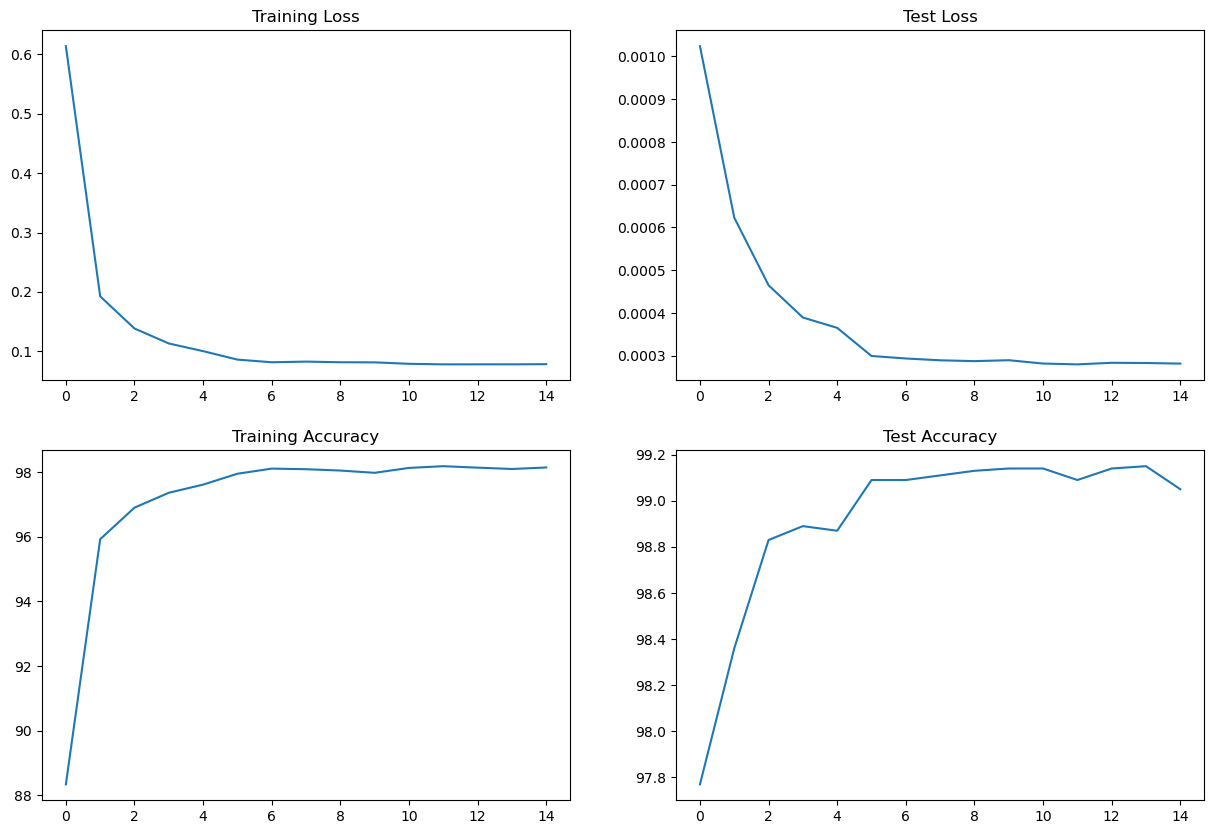

In [14]:
metrics = scores()
Plots(None,None,metrics).plot_metrics()

* Result : We are able to design a network which is very very light weighted. 

Best train acc: 98.14

Best val acc : 99.15

* Analysis: It improved its performance significantly. Overfitting has occured at. We may need to try reducing the kernels. Tuning with hyperparameters will help.